# Druglikeness task

Na začatku chci řict, že ja vůbec nevěděl o temate ukolu č. 4, když zarovnaval svůj Cytochrome dataset s Drugbank datasetem podle Lipninskeho pravidel v ukolu č. 3.😉

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors, Crippen, Lipinski
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem.Draw import IPythonConsole
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open('CHEMBL26-chembl_26_activity.csv', 'r') as csvfile:
    inp = csv.DictReader(csvfile, delimiter=";")
    cyto_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in inp if not m['Smiles'] == None]

suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if not m == None]


Bad key "text.kerning_factor" on line 4 in
/Users/hanchary/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
RDKit ERROR: [16:44:22] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:44:22] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:44:22] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:44:22] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:44:22] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:44:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:44:22] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:44:22] ERROR: Can't kekulize mol.  Unkekulized 

RDKit ERROR: [16:44:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [16:44:23] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:44:23] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [16:44:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:44:23] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:44:23] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [16:44:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:44:23] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:44:23] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [16:44:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:44:23] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [16:44:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:44:24] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:44:24] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [16:44:24] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:44:24] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:44:24] ERROR: Could not sanitize molecule ending on line 1151592


Poprvé opakujeme filtry z cvika pro Cytochromův dataset, aby na koncí mět možnost to všechno porovnat. V teto buncí dělám dataframe pro ten dataset, a pak křeslim barplot pro každy sloupec. Celkem, použivám funkci z cvika, jen trochu upravil algoritmus pro generovani dataframů, aby snižet počet prochazeni po datasetu. Pro tehle veci udělal jsem funkci <b>lipninskyCheck()</b>, <b>ghoseCheck()</b> a <b>veberCheck()</b>. Jestli spravne pochopil, tak v cviku prochazime dataset <b><i>4\*delka_datsetu</i></b> pro Lipninskeho a Ghose pravidel a <b><i>2\*delka_datsetu</i></b> pro Vebera. Trochu jsem to upravil, a ted prochazime pro každe pravidlo jen delka_datsetu, což celkem se rovna <b><i>3\*delka_datsetu</i></b>. Můžu to zkratit do <b><i>delka_datsetu</i></b>, ale pro toto potřebuju udelat dataframe zaroven pro všichni pravidla, ale bude to trochu složity k pročteni a pochopeni viceřadkovy přikaz, tak tohle nedělal. Neni to moc duležite pro můj dataset, ale myslim, že nebude to hezky pro velky dataset.



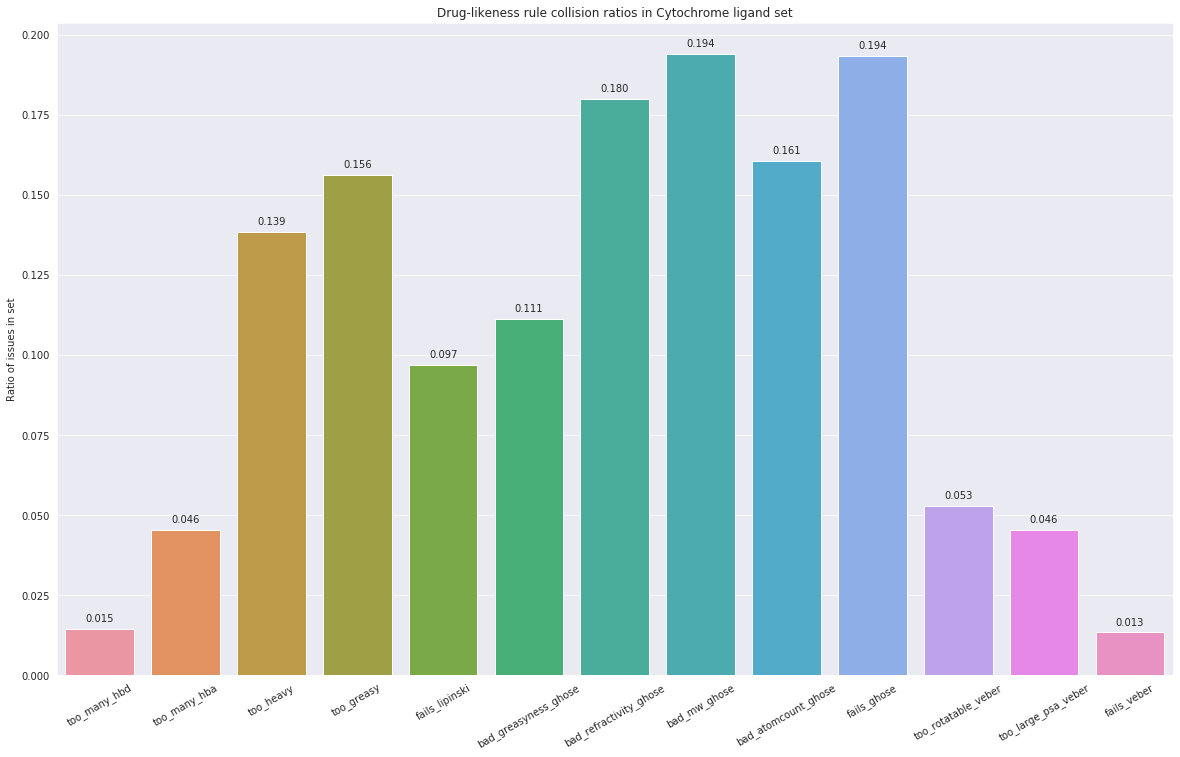

In [3]:
# Funkci pro Lipninskeho pravidla
def too_many_hbd(mol):
    # takes an RDKit mol instance, returns True if the structure is out of LRO5 bounds
    return rdescriptors.CalcNumLipinskiHBD(mol) > 5

def too_many_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 10

def too_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 500

def too_greasy(mol):
    return Descriptors.MolLogP(mol) > 5

def lipninskyCheck(element):
    line = [too_many_hbd(element), too_many_hba(element), too_heavy(element), too_greasy(element)]
    line.append( sum(line)>1 )
    return line



# Funkci pro Ghose pravidla
def bad_greasyness_ghose(mol):
    logp = Descriptors.MolLogP(mol)
    return logp > 5.6 or logp < -0.4

def bad_refractivity_ghose(mol):
    ref = Crippen.MolMR(mol)
    return ref > 130 or ref < 40

def bad_mw_ghose(mol):
    mw = rdescriptors.CalcExactMolWt(mol)
    return mw > 480 or mw < 180

def bad_atomcount_ghose(mol):
    ac = mol.GetNumHeavyAtoms()
    return ac > 70 or ac < 20

def ghoseCheck(element):
    line = [bad_greasyness_ghose(element), bad_refractivity_ghose(element), bad_mw_ghose(element), bad_atomcount_ghose(element)]
    line.append( sum(line)>1 )
    return line

# Funkci pro Vebera

def too_rotatable_veber(mol):
    return Chem.CalcNumRotatableBonds(mol) > 10

def too_large_psa_veber(mol):
    return rdescriptors.CalcTPSA(mol) > 140

def veberCheck(element):
    line = [too_rotatable_veber(element), too_large_psa_veber(element)]
    line.append( sum(line)>1 )
    return line

cyto_df1 = pd.DataFrame( [lipninskyCheck(x) for x in cyto_ligands], columns=['too_many_hbd', 'too_many_hba',
            'too_heavy', 'too_greasy', 'fails_lipinski'])
cyto_df2 = pd.DataFrame( [ghoseCheck(x) for x in cyto_ligands], columns=['bad_greasyness_ghose', 'bad_refractivity_ghose',
                                                                         'bad_mw_ghose', 'bad_atomcount_ghose', 'fails_ghose'])
cyto_df3 = pd.DataFrame( [veberCheck(x) for x in cyto_ligands], columns=['too_rotatable_veber', 'too_large_psa_veber', 'fails_veber'])

cyto_df = pd.concat([cyto_df1, cyto_df2, cyto_df3], axis=1)


with sns.axes_style("darkgrid"):
    plt.figure(figsize=(20,12))
    p = sns.barplot(data=cyto_df, ci=None)
    p.set_title("Drug-likeness rule collision ratios in Cytochrome ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)
    for pat in p.patches:
        p.annotate(format(pat.get_height(), '.3f'), 
                 (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), textcoords = 'offset points')

Na barplotu vidime, že z Cytochrome datasetu neudělali testy Lipinskeho, Ghose a Vebera 9.7%, 19.4% a 1.3% dat resp. Je to přiblizně 2-3x krat min, než pro daty z mTOR datasetu, a take mene než pro daty z DrugBanku. Dobře, tak opakovali jsme cviko, ted naimlpementujeme nejaky jiny filtr. Našel jsem jsem pravidla Schneiderovi and Baringhausovi, které řika, že:

- A drug-like molecule should not have more than 5 rotatable bonds (sometimes reffered to as the fifth Lipinski rule).
- A drug-like molecule should not possess a polar surface area exceeding 120 $Å^2$, since it would then not be sufficiently lipophilic to enter the blood-stream through passive intestinal absorption in the small intestine.
- A drug-like molecule should not have an aqueous solubility (logS) less than -4


Tak, RDKit nema methodu pro spočitani logS. Po Googlovani, našel jsem řešeni na tehle strance https://github.com/PatWalters/solubility/blob/master/esol.py. Vypujčil jsem tam 2 funkci <b>calc_esol_descriptors()</b>, <b>calc_esol_orig()</b> a <b>calc_ap()</b>.

In [4]:
def calc_ap(mol):
        """
        Calculate aromatic proportion #aromatic atoms/#atoms total
        :param mol: input molecule
        :return: aromatic proportion
        """
        matches = mol.GetSubstructMatches(Chem.MolFromSmarts("a"))
        return len(matches) / mol.GetNumAtoms()

def calc_esol_descriptors(mol):
        """
        Calcuate mw,logp,rotors and aromatic proportion (ap)
        :param mol: input molecule
        :return: named tuple with descriptor values
        """
        mw = Descriptors.MolWt(mol)
        logp = Crippen.MolLogP(mol)
        rotors = Lipinski.NumRotatableBonds(mol)
        ap = calc_ap(mol)
        return [mw, logp, rotors, ap]

def calc_esol_orig(mol):
        """
        Original parameters from the Delaney paper, just here for comparison
        :param mol: input molecule
        :return: predicted solubility
        """
        # just here as a reference don't use this!
        intercept = 0.16
        coef = {"logp": -0.63, "mw": -0.0062, "rotors": 0.066, "ap": -0.74}
        desc = calc_esol_descriptors(mol)
        esol = intercept + coef["logp"] * desc[1] + coef["mw"] * desc[0] + coef["rotors"] * desc[2] \
               + coef["ap"] * desc[3]
        return esol

Dale delame novy dataframe <b>cyto_df4</b>. Nevim co stalo, ale na začatku prošly přez filtr špaté latky, a měl jsem chyby z toho důvodu, že ona nemá atomů. Odstranil jsem ji, ale ted dataframe je o 1 zaanam kartši, tak nemuži jich sjednocit.

In [5]:
def rotatableBonds(mol):
    return Lipinski.NumRotatableBonds(mol) > 5

def tpsa(mol):
    return rdescriptors.CalcTPSA(mol) > 120

def logS(mol):
    return calc_esol_orig(mol) < -4

def SchneidBaringCheck(mol):
    line = [rotatableBonds(mol), tpsa(mol), logS(mol)]
    line.append( sum(line)>1 )
    return line

cyto_df4 = pd.DataFrame( [SchneidBaringCheck(x) for x in cyto_ligands if not x.GetNumAtoms() == 0], columns=['too_many_rotatable', 'too_big_tpsa',
             'too_big_logS', 'fails_SchneiderBaring'])

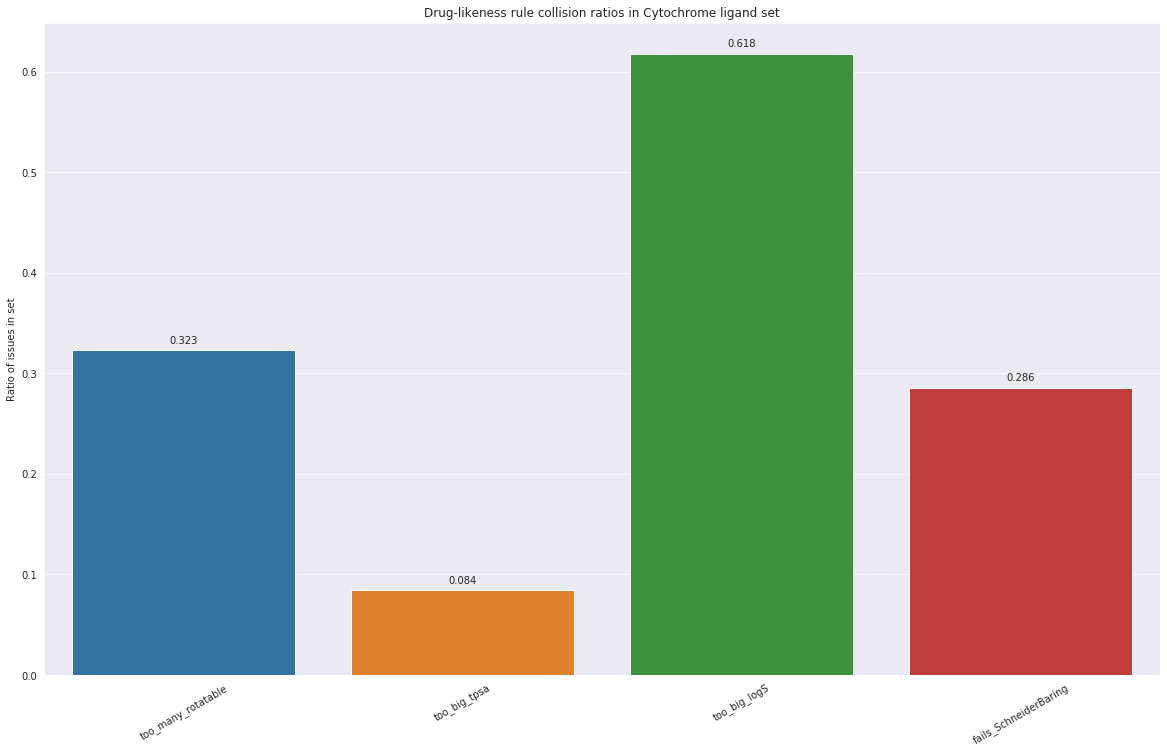

In [6]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(20,12))
    p = sns.barplot(data=cyto_df4, ci=None)
    p.set_title("Drug-likeness rule collision ratios in Cytochrome ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)
    for pat in p.patches:
        p.annotate(format(pat.get_height(), '.3f'), 
                 (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), textcoords = 'offset points')

Ale, to, že mamé o přiblizně 90 latek y 13000 nic hodně neměni. Takže, vypada, že můj Schneider and Baringhaus filter odstrani přiblizně 28.6% latek. Ok, a nakonec podivame se na to, kolik latek on odstrani z DrugBanku.

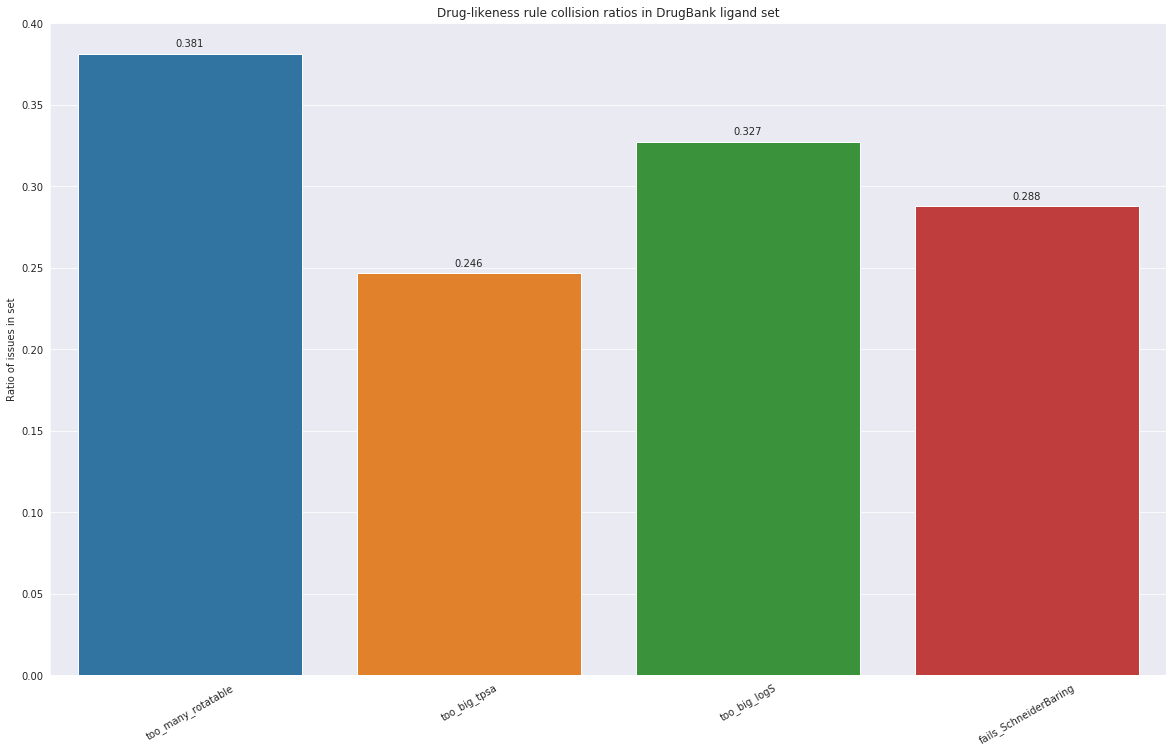

In [7]:
drug_df = pd.DataFrame( [SchneidBaringCheck(x) for x in drugs if not x.GetNumAtoms() == 0], columns=['too_many_rotatable', 'too_big_tpsa',
             'too_big_logS', 'fails_SchneiderBaring'])
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(20,12))
    p = sns.barplot(data=drug_df, ci=None)
    p.set_title("Drug-likeness rule collision ratios in DrugBank ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)
    for pat in p.patches:
      p.annotate(format(pat.get_height(), '.3f'), 
                 (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), textcoords = 'offset points')

Vidime, že všichni parametry v Cytochrome datasetu je menši, kromě logS. Mohlo by to byt zajimave pro dalši vyzkum, ale nechme to pro nějakeho chytreho vědca.😎